# Machine Learning

Myriah Hodgson, for DSCI 372

In [1]:
# imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

Load the data (now cleaned) again and identify our features and target variable:

In [2]:
parks = pd.read_csv('Cleaned_ParkData.csv')

y = parks['High_Visitation'] # target variable

X = parks.drop(columns=['High_Visitation']) # all other features

First we can split the data into training, validation, and testing sets:

In [3]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_testing_val, y_train, y_testing_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Then from there, split the testing data into test (10%) and validation (10%) sets
X_test, X_validation, y_test, y_validation = train_test_split(X_testing_val, y_testing_val, test_size=0.5, random_state=42)

print(f"Train shape: {X_train.shape}")
print(f"Validation shape: {X_validation.shape}")
print(f"Test shape: {X_test.shape}")

Train shape: (26716, 165)
Validation shape: (3340, 165)
Test shape: (3339, 165)


## Logistic Classification

In [4]:
# import logistic regression model, assign it
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=5000, C=10, penalty='l1', solver='liblinear') 
    
    # Added lasso regression to improve accuracy
    # Also increased the total number of iterations

# fit the model on the training data
logistic_model.fit(X_train, y_train)

# using the model, predict for the training and validation sets
log_validation_prediction = logistic_model.predict(X_validation)
log_train_prediction = logistic_model.predict(X_train)

# get accuracies
log_train_accuracy = accuracy_score(log_train_prediction, y_train)
log_validation_accuracy = accuracy_score(log_validation_prediction, y_validation)

print(f"Training Accuracy: {log_train_accuracy}")
print(f"Validation Accuracy: {log_validation_accuracy}")

print("Classification Report (of the Validation Set):")
print(classification_report(y_validation, log_validation_prediction))

Training Accuracy: 0.7819658631531666
Validation Accuracy: 0.7844311377245509
Classification Report (of the Validation Set):
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1725
           1       0.79      0.76      0.77      1615

    accuracy                           0.78      3340
   macro avg       0.78      0.78      0.78      3340
weighted avg       0.78      0.78      0.78      3340



## Support Vector Machine

Let's first try it with a rbf kernel:

In [5]:
from sklearn.svm import SVC

# define the model, then fit the data
svm_model_rbf = SVC(kernel="rbf", gamma="auto", random_state=42)
svm_model_rbf.fit(X_train, y_train)

SVC(gamma='auto', random_state=42)

In [6]:
# using the model, predict for the training and validation sets
rbf_validation_prediction = svm_model_rbf.predict(X_validation)
rbf_train_prediction = svm_model_rbf.predict(X_train)

# get accuracies
rbf_train_accuracy = accuracy_score(rbf_train_prediction, y_train)
rbf_validation_accuracy = accuracy_score(rbf_validation_prediction, y_validation)

print(f"Training Accuracy: {rbf_train_accuracy}")
print(f"Validation Accuracy: {rbf_validation_accuracy}")

print("Classification Report (of the Validation Set):")
print(classification_report(y_validation, rbf_validation_prediction))

Training Accuracy: 0.8086914208713879
Validation Accuracy: 0.744311377245509
Classification Report (of the Validation Set):
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1725
           1       0.73      0.75      0.74      1615

    accuracy                           0.74      3340
   macro avg       0.74      0.74      0.74      3340
weighted avg       0.74      0.74      0.74      3340



And next with a poly kernel:

In [81]:
svm_model_poly = SVC(kernel="poly", class_weight='balanced', degree=6, C=1000, random_state=42)
svm_model_poly.fit(X_train, y_train) # TODO - fix this or use a different kernel"""

SVC(C=1000, class_weight='balanced', degree=6, kernel='poly', random_state=42)

In [82]:
# using the model, predict for the training and validation sets
poly_validation_prediction = svm_model_poly.predict(X_validation)
poly_train_prediction = svm_model_poly.predict(X_train)

# get accuracies
poly_train_accuracy = accuracy_score(poly_train_prediction, y_train)
poly_validation_accuracy = accuracy_score(poly_validation_prediction, y_validation)

print(f"Training Accuracy: {poly_train_accuracy}")
print(f"Validation Accuracy: {poly_validation_accuracy}")

print("Classification Report (of the Validation Set):")
print(classification_report(y_validation, poly_validation_prediction))

Training Accuracy: 0.5484353945201378
Validation Accuracy: 0.5622754491017964
Classification Report (of the Validation Set):
              precision    recall  f1-score   support

           0       0.54      0.99      0.70      1725
           1       0.92      0.10      0.19      1615

    accuracy                           0.56      3340
   macro avg       0.73      0.55      0.44      3340
weighted avg       0.73      0.56      0.45      3340



## Decision Trees

In [9]:
from sklearn.tree import DecisionTreeClassifier

# define/train the model
tree_model = DecisionTreeClassifier(random_state=4, max_depth=11) # TODO - can change max_depth, min_samples_split, min_samples_leaf
tree_model.fit(X_train, y_train)

# compute predictions
tree_train_predictions = tree_model.predict(X_train)
tree_validation_predictions = tree_model.predict(X_validation)

# compute accuracy scores
tree_train_accuracy = accuracy_score(y_train, tree_train_predictions)
tree_validation_accuracy = accuracy_score(y_validation, tree_validation_predictions)

# print accuracy/classification results
print(f"Training Accuracy: {tree_train_accuracy}")
print(f"Validation Accuracy: {tree_validation_accuracy}")

print("Classification Report (of the Validation Set):")
print(classification_report(y_validation, tree_validation_predictions))

Training Accuracy: 0.9045890103308879
Validation Accuracy: 0.8793413173652694
Classification Report (of the Validation Set):
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1725
           1       0.88      0.87      0.87      1615

    accuracy                           0.88      3340
   macro avg       0.88      0.88      0.88      3340
weighted avg       0.88      0.88      0.88      3340



## Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

# define and train the model TODO - can change max_depth, min_samples_split, min_samples_leaf
forest_model = RandomForestClassifier(n_estimators=100, max_depth=18, random_state=42)
forest_model.fit(X_train, y_train)

# make predictions
forest_train_predictions = forest_model.predict(X_train)
forest_validation_predictions = forest_model.predict(X_validation)

# compute accuracy scores
forest_train_accuracy = accuracy_score(y_train, forest_train_predictions)
forest_validation_accuracy = accuracy_score(y_validation, forest_validation_predictions)

# print accuracy/classification results
print(f"Training Accuracy: {forest_train_accuracy}")
print(f"Validation Accuracy: {forest_validation_accuracy}")

print("Classification Report (of the Validation Set):")
print(classification_report(y_validation, forest_validation_predictions))

Training Accuracy: 0.9596496481509208
Validation Accuracy: 0.9095808383233533
Classification Report (of the Validation Set):
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1725
           1       0.92      0.90      0.91      1615

    accuracy                           0.91      3340
   macro avg       0.91      0.91      0.91      3340
weighted avg       0.91      0.91      0.91      3340



## Neural Network

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [13]:
# Convert to tensor
X_train_tensor = torch.from_numpy(np.array(X_train, dtype=np.float32))
y_train_tensor = torch.from_numpy(np.array(y_train, dtype=np.int64)).long()

X_validation_tensor = torch.from_numpy(np.array(X_validation, dtype=np.float32))
y_validation_tensor = torch.from_numpy(np.array(y_validation, dtype=np.int64)).long()

# create DataLoader for batching 
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

num_classes = 2

In [58]:
class SimpleModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleModel, self).__init__()
        # Define a simple neural network
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, output_size)
        #self.relu = nn.ReLU()
        self.tanh = nn.Tanh()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        temp = self.fc4(self.tanh(self.fc3(self.tanh(self.fc2(self.tanh(self.fc1(x)))))))
        return self.sigmoid(temp.squeeze())
    
def train_step(model, X_train, y_train, loss_fn, optimizer, device):
    model.train()  # Set the model to training mode
    
    # Move data to the specified device (CPU/GPU)
    X_train, y_train = X_train.to(device), y_train.to(device)

    # Zero the gradients before running the backward pass
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train)
    
    # Compute the loss
    loss = loss_fn(outputs, y_train)
    
    # Backward pass
    loss.backward()
    
    # Optimize the model's weights
    optimizer.step()

    # Track the loss and accuracy
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == y_train).sum().item()
    accuracy = 100 * correct / len(y_train)
    
    return loss.item(), accuracy

def evaluation_step(model, X_test, y_test, loss_fn, device):
    model.eval()  # Set the model to evaluation mode
    
    # Move data to the specified device (CPU/GPU)
    X_test, y_test = X_test.to(device), y_test.to(device)
    
    with torch.no_grad():  # Disable gradient computation during evaluation
        # Forward pass
        outputs = model(X_test)
        
        # Calculate loss
        test_loss = loss_fn(outputs, y_test)
        
        # Get predictions
        _, predicted = torch.max(outputs, 1)
        
        # Calculate accuracy
        correct = (predicted == y_test).sum().item()
        accuracy = 100 * correct / len(y_test)
    
    return test_loss.item(), accuracy

def train_simple_model(X_train, y_train, X_test, y_test, random_seed):
    # Make device
    device = "cpu" 
    if torch.cuda.is_available(): 
        device = "cuda"
    else:
        if torch.backends.mps.is_available():
            device = "mps" 
    
    torch.manual_seed(random_seed) # do not change this

    # TODO: write codes to train your model here

    # initialize model
    # decide which loss function/optimizer to use
    # keep track of loss/accuracy
    # output is the trained model, training/test accuracy/loss for all epochs

    train_loss = []
    train_accuracy = []

    test_loss = []
    test_accuracy = []

    num_epochs = 10000
    model = SimpleModel(X_train.shape[1], num_classes).to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)

    
    for epoch in range(num_epochs):
        train = train_step(model=model, X_train=X_train, y_train=y_train, loss_fn=loss_fn, optimizer=optimizer, device=device)
        train_loss.append(train[0])
        train_accuracy.append(train[1])
        evaluate = evaluation_step(model=model, X_test=X_test, y_test=y_test, loss_fn=loss_fn, device=device)
        test_loss.append(evaluate[0])
        test_accuracy.append(evaluate[1])

    return model, train_loss, train_accuracy, test_loss, test_accuracy

# TODO: plot accuracy curves
def plot_accuracy_performance(train_accuracies, test_accuracies):
    # Todo: plot the prediction accuracy curves of the training and test sets
    #      during the training process
    sns.lineplot(test_accuracies, label='Test Accuracy', color='#7E2E84')
    sns.lineplot(train_accuracies, label='Train Accuracy', color='#127475')
    plt.title('Accuracy Curves')
    plt.xlabel('Number of Iterations'); plt.ylabel('Accuracy')
    last_test_accuracy = test_accuracies[-1]
    print(f"Final Test Accuracy: {last_test_accuracy:.2f}%")

# TODO: plot loss curves
def plot_loss_performance(train_losses, test_losses):
    # Convert PyTorch tensors to NumPy arrays
    train_losses = [float(loss) for loss in train_losses]
    test_losses = [float(loss) for loss in test_losses]

    # Plot the loss curves
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=train_losses, label='Train Loss', color='#127475')
    sns.lineplot(data=test_losses, label='Test Loss', color='#7E2E84')

    plt.title('Loss Performance')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [ ]:
nn_train_losses = []
nn_train_accuracies = []
nn_test_losses = [] # this is for the validation set
nn_test_accuracies = [] # this is also for the validation set

random_seeds = np.random.randint(100, size=5)
for random_seed in random_seeds:
    # Do not change this cell
    model, train_losses, train_accuracies, test_losses, test_accuracies\
    = train_simple_model(X_train_tensor, y_train_tensor, X_validation_tensor, y_validation_tensor, random_seed)
    nn_train_losses.append(train_losses)
    nn_train_accuracies.append(train_accuracies)
    nn_test_losses.append(test_losses)
    nn_test_accuracies.append(test_accuracies)

In [96]:
final_train_accuracies = []
for accuracy in nn_train_accuracies:
    final_train_accuracies.append(accuracy[-1])
print(f"The average train accuracy over 5 random seeds is: {np.average(final_train_accuracies)}")

The average train accuracy over 5 random seeds is: 85.11603533463094


In [63]:
final_validation_accuracies = []
for accuracy in nn_test_accuracies: # supposed to be validation accuracy... but I am not waiting 15mins again!
    final_accuracy = accuracy[-1]
    final_validation_accuracies.append(final_accuracy)

print(f"The averaged validation accuracy over 5 random seeds is: {np.average(final_validation_accuracies)}")

The averaged validation accuracy over 5 random seeds is: 85.55089820359282


In [59]:
random_seed = 22

model, train_losses, train_accuracies, test_losses, test_accuracies\
    = train_simple_model(X_train_tensor, y_train_tensor, X_validation_tensor, y_validation_tensor, random_seed)

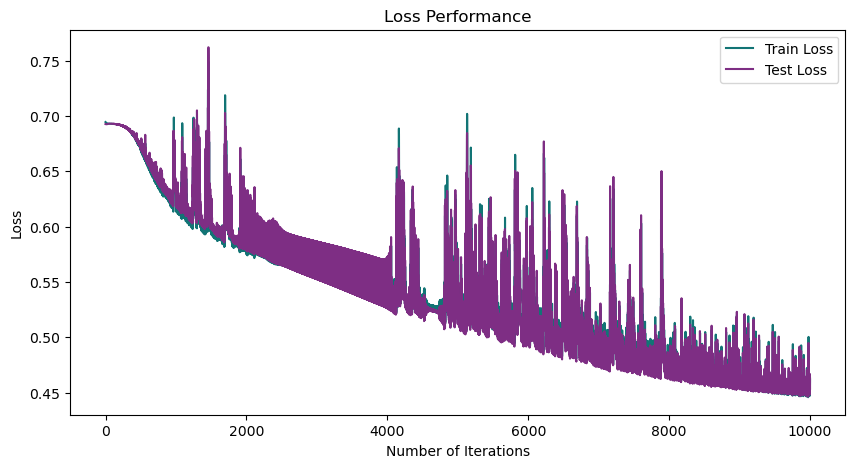

In [64]:
# Do not change this cell
plot_loss_performance(train_losses, test_losses)

Final Test Accuracy: 85.75%


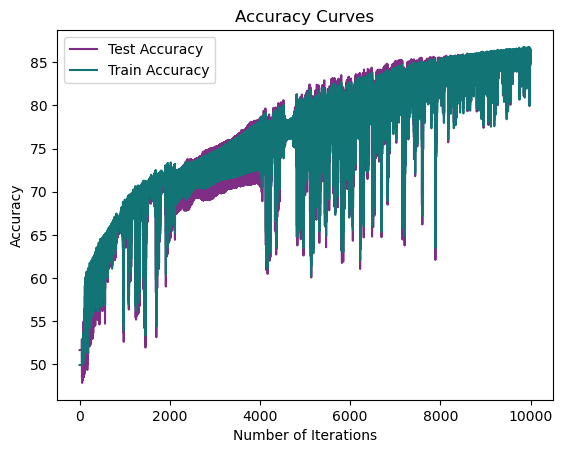

In [65]:
# Do not change this cell
plot_accuracy_performance(train_accuracies, test_accuracies)

## Test Accuracies

Now that we have trained these various models and used the validation set to tune hyperparameters, we can compute the final accuracies of the test set on each of these models.

### Logistic Regression

In [84]:
logistic_test_predictions = logistic_model.predict(X_test)
print(f"Classification Report of the Test Set:\n {classification_report(y_test, logistic_test_predictions)}")

Classification Report of the Test Set:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78      1655
           1       0.80      0.76      0.78      1684

    accuracy                           0.78      3339
   macro avg       0.78      0.78      0.78      3339
weighted avg       0.78      0.78      0.78      3339



### SVM

In [85]:
SVM_test_predictions = svm_model_rbf.predict(X_test)
print(f"Classification Report of the Test Set:\n {classification_report(y_test, SVM_test_predictions)}")

Classification Report of the Test Set:
               precision    recall  f1-score   support

           0       0.76      0.77      0.76      1655
           1       0.77      0.76      0.76      1684

    accuracy                           0.76      3339
   macro avg       0.76      0.76      0.76      3339
weighted avg       0.76      0.76      0.76      3339



### Decision Tree

In [86]:
tree_test_predictions = tree_model.predict(X_test)
print(f"Classification Report of the Test Set:\n {classification_report(y_test, tree_test_predictions)}")

Classification Report of the Test Set:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88      1655
           1       0.89      0.88      0.88      1684

    accuracy                           0.88      3339
   macro avg       0.88      0.88      0.88      3339
weighted avg       0.88      0.88      0.88      3339



### Random Forest

In [87]:
forest_test_predictions = forest_model.predict(X_test)
print(f"Classification Report of the Test Set:\n {classification_report(y_test, forest_test_predictions)}")

Classification Report of the Test Set:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      1655
           1       0.94      0.90      0.92      1684

    accuracy                           0.92      3339
   macro avg       0.92      0.92      0.92      3339
weighted avg       0.92      0.92      0.92      3339



### Neural Network

In [93]:
X_test_tensor = torch.from_numpy(np.array(X_test, dtype=np.float32))
y_test_tensor = torch.from_numpy(np.array(y_test, dtype=np.int64))

device = "cpu"
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"

loss_fn = nn.CrossEntropyLoss()

# Evaluate on the test set
test_loss, test_accuracy = evaluation_step(model, X_test_tensor, y_test_tensor, loss_fn, device)

print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 84.94%
